In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data which has completed the preprocessing steps

In [2]:
FIFADF_Pure=pd.read_csv('Katragadda_pp.csv')

In [3]:
FIFADF_Pure.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,International Reputation,Body Type,Real Face,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Stronger Right Foot,WorkRate1,WorkRate2,Major_Nation
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,5.0,Messi,1,...,26.0,6.0,11.0,15.0,14.0,8.0,0.0,Medium,Medium,1
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,5.0,C. Ronaldo,1,...,23.0,7.0,11.0,15.0,14.0,11.0,1.0,High,Low,1
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,5.0,Neymar,1,...,33.0,9.0,9.0,15.0,15.0,11.0,1.0,High,Medium,1
3,3,De Gea,27,Spain,91,93,Manchester United,4.0,Lean,1,...,13.0,90.0,85.0,87.0,88.0,94.0,1.0,Medium,Medium,1
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,4.0,Normal,1,...,51.0,15.0,13.0,5.0,10.0,13.0,1.0,High,High,1


In [4]:
FIFADF_Pure.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'International Reputation', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Stronger Right Foot', 'WorkRate1', 'WorkRate2', 'Major_Nation'],
      dtype='object')

#### droping the categorical features from the dataset.

In [5]:
FIFADF_Pure=FIFADF_Pure.drop(['Unnamed: 0','Name','Club','Body Type',
                              'Position','WorkRate1','WorkRate2','Nationality'],axis=1)

#### seperating the Target and descriptive features

In [6]:
My_Target = FIFADF_Pure.Overall
FIFA_Ready = FIFADF_Pure.drop(['Overall'], axis = 1)

#### Splitting the data into training and testing samples.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FIFA_Ready,My_Target, test_size=0.2)


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(14500, 41) (14500,)
(3625, 41) (3625,)


# Linear Regression

### Training the Linear Regression model with training data

In [8]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression() #creating the Linear Regression Model

model.fit(X_train, y_train)#traning the model with the help of training data

predictions = model.predict(X_test)
#Evaluating predictions with the help of X_test dta


#### Evaluating the performance of the LR

In [9]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))
print('Mean absolute error : '+str(mean_absolute_error(y_test, predictions)))
#print("Accuracy:",metrics.accuracy_score(y_test, predictions))

r2 score: 0.9290823484492826
RMSE : 1.8463448422420468
Mean absolute error : 1.4548773254486567


#### Showing the Linear line obtained by Linear Regression

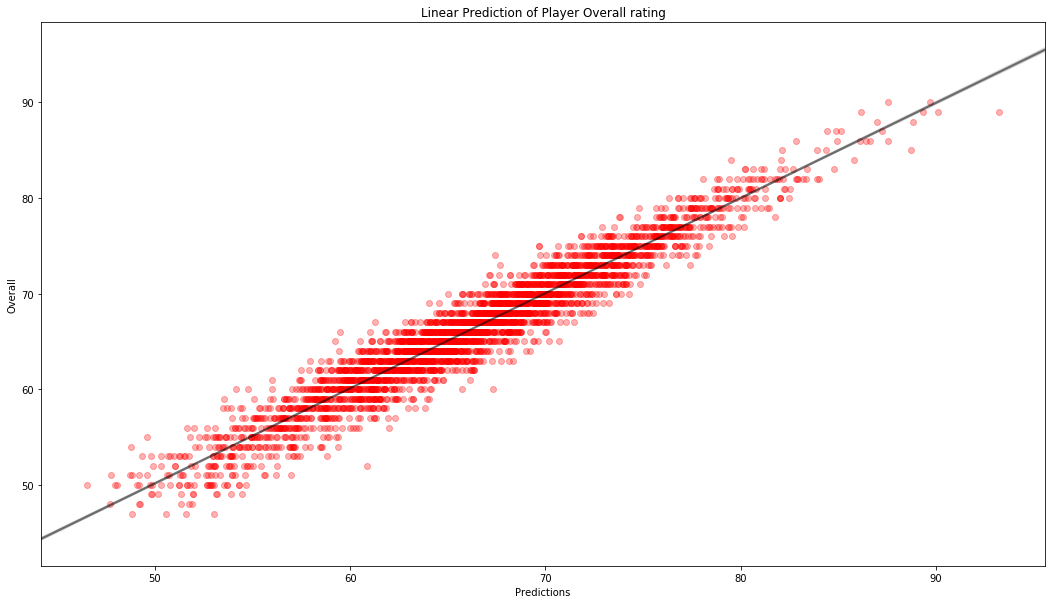

In [10]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'red'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Overall rating")
plt.show()

# KNN Regression

### Training the KNN Regression model with training data

In [11]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,r2_score

from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline



KNNR = neighbors.KNeighborsRegressor(n_neighbors = 3) #initially we are assignning k=3

KNNR.fit(X_train, y_train)  #fit the model
predt=KNNR.predict(X_test) #make prediction on test set


#### Evaluating the performance of the KNN regression

In [12]:
error = sqrt(mean_squared_error(y_test,predt))#calculate rmse

print('RMSE value for k=5 is:', error)

print('r2 score: '+str(r2_score(y_test, predt)))
print('Mean absolute error : '+str(mean_absolute_error(y_test, predt)))

RMSE value for k=5 is: 1.9352982484218881
r2 score: 0.9220843824035004
Mean absolute error : 1.4906666666666666


### Applying Hyper-parameter tuning manually

In [13]:
rmse_metric = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    KNNR = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNNR.fit(X_train, y_train)  #fit the model
    predt=KNNR.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,predt))
    rmse_metric.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.585636718756003
RMSE value for k=  2 is: 2.1046254478795197
RMSE value for k=  3 is: 1.9352982484218881
RMSE value for k=  4 is: 1.8445118969339922
RMSE value for k=  5 is: 1.8124930439818958
RMSE value for k=  6 is: 1.7771581774674599
RMSE value for k=  7 is: 1.7522094226037896
RMSE value for k=  8 is: 1.7427942783219492
RMSE value for k=  9 is: 1.7390357128960778
RMSE value for k=  10 is: 1.7355273470659554
RMSE value for k=  11 is: 1.7337939921730972
RMSE value for k=  12 is: 1.7283726538716528
RMSE value for k=  13 is: 1.731651646554613
RMSE value for k=  14 is: 1.7379645451010066
RMSE value for k=  15 is: 1.740848077992833
RMSE value for k=  16 is: 1.7477716724347943
RMSE value for k=  17 is: 1.7481961999347138
RMSE value for k=  18 is: 1.7492634221927155
RMSE value for k=  19 is: 1.7508606565042815
RMSE value for k=  20 is: 1.7579209899470887
RMSE value for k=  21 is: 1.7604954200043916
RMSE value for k=  22 is: 1.7643368676367157
RMSE value for k=  23 

#### Plotting a curve to evaluate the performance of KNN

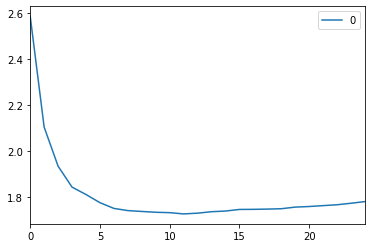

In [14]:
KNN_curve = pd.DataFrame(rmse_metric) #elbow curve 
KNN_curve.plot()

### We can see that Initial RMSE value is high at begining , then it reached to minimum and again started increasing again

### Applying Hyper-parameter Tuning with GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knnr = neighbors.KNeighborsRegressor()

modelgv = GridSearchCV(knnr, parameters, cv=5)
modelgv.fit(X_train,y_train)
modelgv.best_params_

{'n_neighbors': 9}

### We got result as K=9 is the best value for number of neighbour

#### Now, we will train KNN with k=9 and see if there is any improvement in the performance

In [16]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,r2_score

from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline



KNNR = neighbors.KNeighborsRegressor(n_neighbors = 9)
#assigning the value of k=9
KNNR.fit(X_train, y_train)  #fit the model


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

#### Evaluating the performance of the model after tuning

In [17]:
predt=KNNR.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,predt))#calculate rmse
print('RMSE value for k=9 is:', error)
#print('R2 error is ',accuracy_score(y_test,pred))
print('r2 score: '+str(r2_score(y_test, predt)))
print('Mean absolute error : '+str(mean_absolute_error(y_test, predt)))

RMSE value for k=9 is: 1.7390357128960778
r2 score: 0.937086229769494
Mean absolute error : 1.3470651340996171


#### We can see that there is an improvement in the model performance, after we have trained the model with value given by the Hyper-paramter Tuning.

# Random Forest

#### Training the RandomForest Regressor model 

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

randomreg=RandomForestRegressor()
randomreg.fit(X_train,y_train)




C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Calculating the MAE 

In [19]:
# Use the forest's predict method on the test data
predictions = randomreg.predict(X_test)
# Calculate the absolute errors
error1 = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(error1), 2), 'degrees.')

Mean Absolute Error: 0.83 degrees.


#### Calculating the Accuracy of the RandomForest Regressor model.

In [20]:
# Calculate mean absolute percentage error (MAPE)
mape1 = 100 * (error1 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape1)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.71 %.


In [21]:
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9702101455167765
RMSE : 1.196657413597242


### Additional model tried

# Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
regressor = DecisionTreeRegressor(random_state=0)

regressor=regressor.fit(X_train, y_train)
#regressor.score(X_train, y_train)
predicted = regressor.predict(X_test)



In [23]:
print('r2 score: '+str(r2_score(y_test, predicted)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predicted))))
#print("Accuracy:",metrics.accuracy_score(y_test, predicted))

r2 score: 0.9264917768436649
RMSE : 1.8797652091097203


#### We got satisfactory results with Decision Tree Regressor as well

### Taking more time to display the decision tree, may be becuase of huge amount of data.

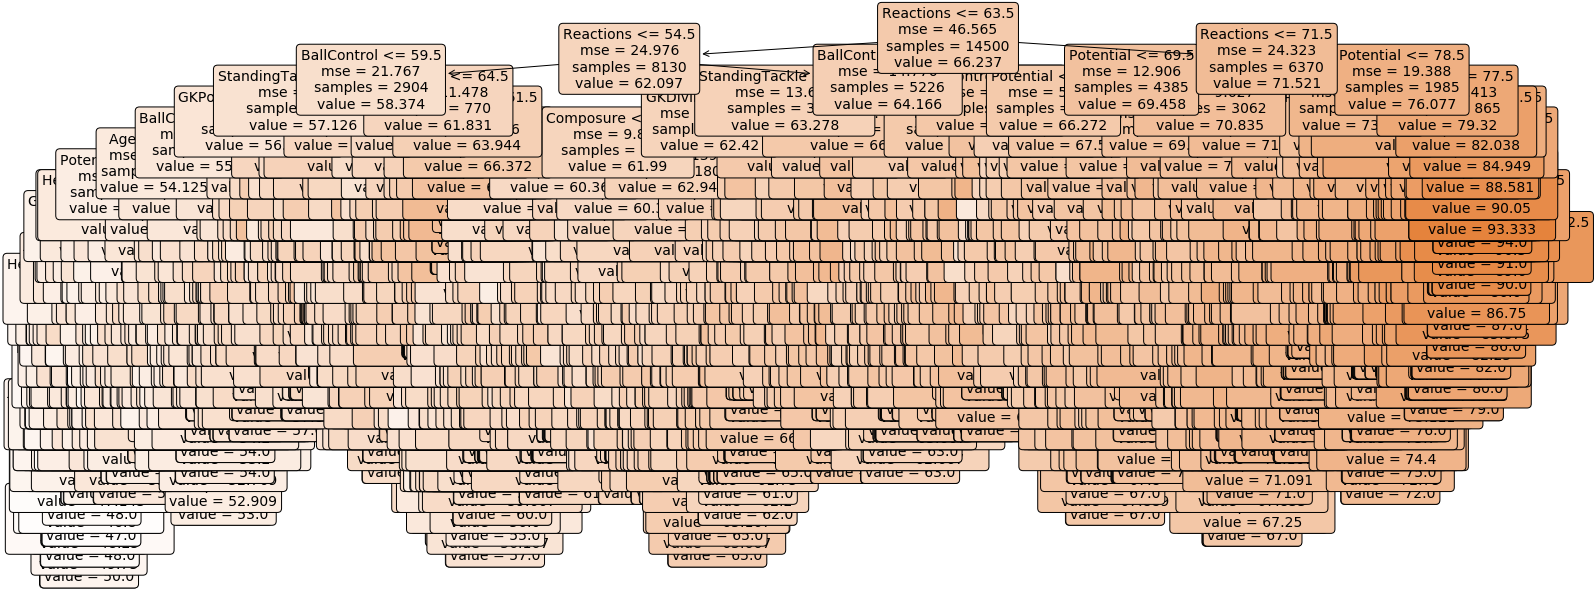

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X_train.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14)